In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
SAMPLE_MIN = 0
SAMPLE_MAX = 15
SAMPLE_RANGE = (SAMPLE_MIN, SAMPLE_MAX)
num_samples = 30


In [3]:
def normal_dist(x: float, mean: float, deviation: float):
    return (1 / (math.sqrt(2 * math.pi) * deviation)) * math.exp(
        -0.5 * (((x - mean) ** 2) / (deviation**2))
    )

def p(x: int):
    return (
        0.3 * normal_dist(x, 2, 1)
        + 0.4 * normal_dist(x, 5, 2)
        + 0.3 * normal_dist(x, 9, 1)
    )


In [4]:
def gen_uniform_samples(sample_range: tuple[int,int]=SAMPLE_RANGE, k=num_samples, seed=0):
    rng = np.random.default_rng(seed)
    # Make k evenly spaced segments for the sample range
    segments = np.linspace(*sample_range, k + 1)
    # offset high by 1 from low, so for [0, 15] with k=15, we generate random numbers for {[0,1), [1,2),...}
    # for k=30 it would be {[0, 0.5), [0.5, 1),...}
    return rng.uniform(segments[:-1], segments[1:])


In [5]:
def resample(samples, proposal_density, k=num_samples):
    target_density = np.array([p(i) for i in samples])  # np arrays allow division
    weights = target_density / proposal_density
    normalized_weights = weights / np.sum(weights)

    return [samples[resampled_idx] for resampled_idx in np.random.choice(np.arange(k), k, p=normalized_weights)]


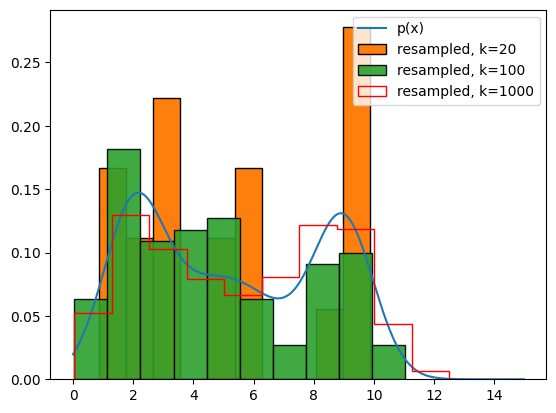

In [7]:
x = np.arange(0,15,0.01)
y = [p(idx) for idx in x]
plt.plot(x, y, label="p(x)")
for alpha, histtype, edgecolor, k in zip((1, 0.9, 1), ("bar", "bar", "step"), ("black", "black", "red"),(20,100,1000)):
    samples = gen_uniform_samples(k=k, seed=int(datetime.now().timestamp()))
    resampled_samples = resample(samples, 1/15, k=k)
    plt.hist(resampled_samples, density=True, label=f"resampled, k={k}",alpha=alpha ,histtype=histtype,edgecolor=edgecolor)
plt.legend()
plt.show()